In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, mean_squared_log_error
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("data/titantic-train.csv")
df = df[["Fare", "Age", "Pclass", "SibSp", "Parch", "Survived"]].dropna()

X = df.iloc[:, :-1]
y = df.iloc[:, -1:].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

## Accuracy Score

In [34]:
rf.score(X_test, y_test)

0.6703910614525139

In [35]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6703910614525139

## Confusion Matrix

### Calculating a confusion matrix

```
+---------------+------------------+-----------------+
|               | Predicted: False | Predicted: True |
+---------------+------------------+-----------------+
| Actual: False | True Negative    | False Positive  |
| Actual: True  | False Negative   | True Positive   |
+---------------+------------------+-----------------+
```

In [46]:
c_matrix = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred, target_names=["Died", "Survived"])

true_negative = c_matrix[0, 0]     # Free customer, correctly predicted
false_positive = c_matrix[0, 1]    # Free customer, but predicted to be paid
false_negative = c_matrix[1, 0]    # Conversion, but predicted to be free
true_positive = c_matrix[1, 1]     # Conversion, correctly predicted

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_negative + true_positive) / (true_negative + false_positive + false_negative + true_positive)

print("Confusion Matrix:\n", c_matrix, "\n")
print("Classification Report:\n", c_report, "\n")

# The % of passengers classified as survived that actually survived
# The % of companies classified as a conversion that actually converted
print("Precision: {:.2f}".format(precision))

# The % of passengers that were correctly identified
# The % of conversions that were correctly identified
print("Recall: {:.2f}".format(recall))

# The overall % correct
print("Accuracy: {:.2f}".format(accuracy))       

Confusion Matrix:
 [[74 32]
 [27 46]] 

Classification Report:
               precision    recall  f1-score   support

        Died       0.73      0.70      0.71       106
    Survived       0.59      0.63      0.61        73

    accuracy                           0.67       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.67      0.67      0.67       179
 

Precision: 0.59
Recall: 0.63
Accuracy: 0.67


### Visualizing a confusion matrix

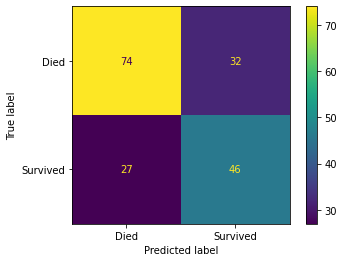

In [37]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=["Died", "Survived"])
plt.show()

## ROC curve

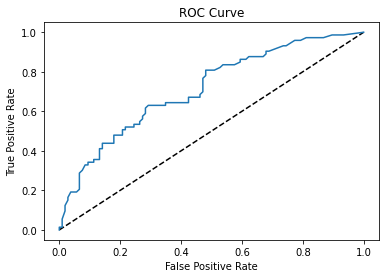

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
# plt.scatter([false_positive_rate], [true_positive_rate], c='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC score

The area under the ROC curve.

In [49]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_prob)

0.7118764538640475

## Mean Squared Log Error

See [calculation method](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)).

In [16]:
y_true = np.array([100])
y_pred = np.array([250])
msle_function = mean_squared_log_error(y_true, y_pred)
print("MSLE function: {:.2f}".format(msle_function))

msle_manual_1 = (np.log(y_true + 1) - np.log(y_pred + 1)) ** 2
print("MSLE manual method 1: {:.2f}".format(msle_manual_1[0]))

msle_manual_2 = (np.log((y_true + 1) / (y_pred + 1))) ** 2
print("MSLE manual method 2: {:.2f}".format(msle_manual_2[0]))

MSLE function: 0.83
MSLE manual method 1: 0.83
MSLE manual method 2: 0.83
